In [45]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils  

In [46]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [47]:
file_path = 'C:/Users/pc/Documents/train.csv'
test_data = pd.read_csv(file_path, delimiter=',', header=0, usecols=[x for x in range(0, 784)])

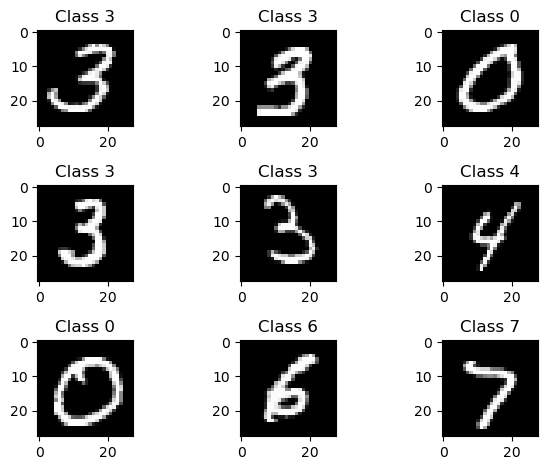

In [48]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [49]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [50]:
no_classes = 10

Y_train = np_utils.to_categorical(y_train, no_classes)
Y_test = np_utils.to_categorical(y_test, no_classes)

In [51]:
model = Sequential()
model.add(Dense(512, input_shape=(784,))) 
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [52]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [53]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 activation_7 (Activation)   (None, 512)               0         
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2527 - accuracy: 0.9236
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1027 - accuracy: 0.9686
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0726 - accuracy: 0.9772
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0558 - accuracy: 0.9818
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0475 - accuracy: 0.9840
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0402 - accuracy: 0.9868
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0333 - accuracy: 0.9886
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0299 - accuracy: 0.9898
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0295 - accuracy: 0.9897
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0238 - accuracy: 0.9924

In [57]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 946us/step - loss: 0.0680 - accuracy: 0.9813
Test accuracy: 0.9812999963760376


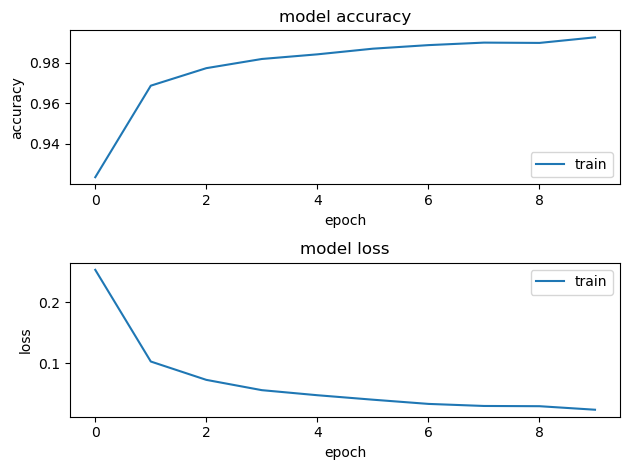

In [58]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [59]:
results = model.predict(test_data)

1313/1313 [==============================] - 1s 804us/step


In [60]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

In [61]:
submission

,ImageId,Label
0,1.0,1
1,2.0,0
2,3.0,1
3,4.0,4
4,5.0,0
...,...,...
41995,NaN,0
41996,NaN,1
41997,NaN,7
41998,NaN,6


In [63]:
class_probabilities = model.predict(X_test)

# Determine the predicted classes based on the highest probability
predicted_classes = np.argmax(class_probabilities, axis=1)

# Now you can continue with your evaluation
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 0s 876us/step


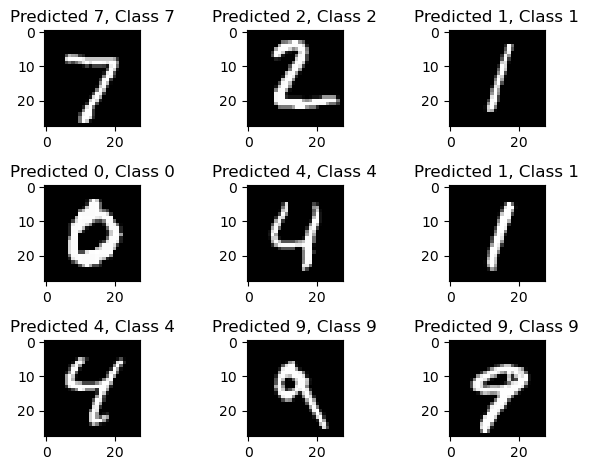

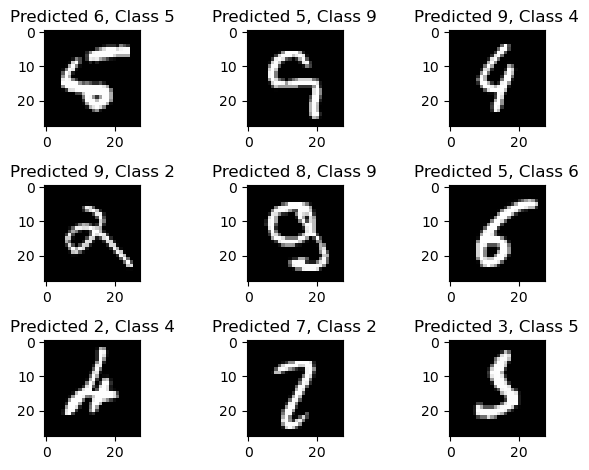

In [64]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()